В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

**1. Метод МНК**

In [2]:
# створюємо базовий датафрейм

medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
# формуємо змінну Х

age = non_smoker_df['age']
X = np.array(age)
ones = np.ones_like(X)

X_1 = np.column_stack((ones, X))

In [4]:
# задаємо цільову змінну у

charges = non_smoker_df['charges']
y = np.array(charges)

In [5]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
MNK_coefs = normal_equations(X_1, y)

In [7]:
np.dot(X_1[0], MNK_coefs)

2719.059874396515

In [8]:
predictions_MNK = np.dot(X_1, MNK_coefs)

**2. Full-Batch градієнтного спуску з `numpy`**

In [9]:
# Градієнтний спуск

def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [10]:
m_1, b_1, errors_1 = full_batch_gradient_descent(X_1, y, lr=0.05, epochs=90)
predictions_fbgd_1 = m_1 * X_1[:, 0] + b_1
m_1, b_1

(4217.1341409276165, 4217.134140927617)

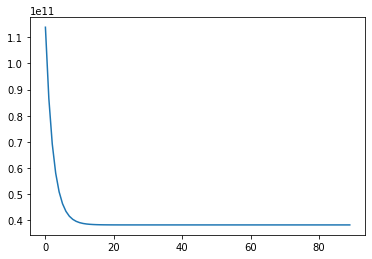

In [11]:
plt.plot(errors_1);

In [12]:
m_2, b_2, errors_2 = full_batch_gradient_descent(X_1, y, lr=0.0005, epochs=1000)
predictions_fbgd_2 = m_2 * X_1[:, 0] + b_2
m_2, b_2

(3647.5489390095236, 3647.548939009524)

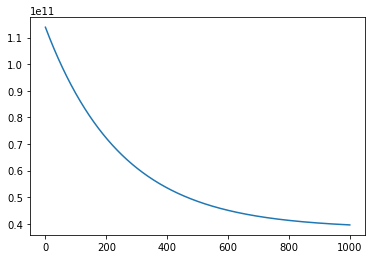

In [13]:
plt.plot(errors_2);

In [14]:
m_3, b_3, errors_3 = full_batch_gradient_descent(X_1, y, lr=0.00001, epochs=1000)
predictions_fbgd_3 = m_3 * X_1[:, 0] + b_3
m_3, b_3

(165.35943665686773, 165.35943665686773)

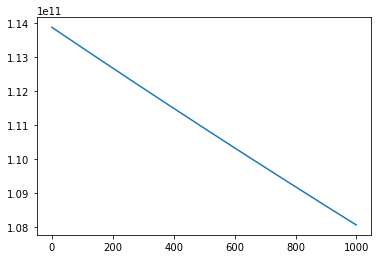

In [15]:
plt.plot(errors_3);

Судячи з отриманих графікв помилок, найкращий результат №1 з `lr=0.05, epochs=90`
Його приймаємо для подальших розрахунків

**3. `scikit-learn.LinearRegression`**

In [16]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_1, y)

LinearRegression()

In [18]:
predictions_sklearn = lin_reg.predict(X_1)

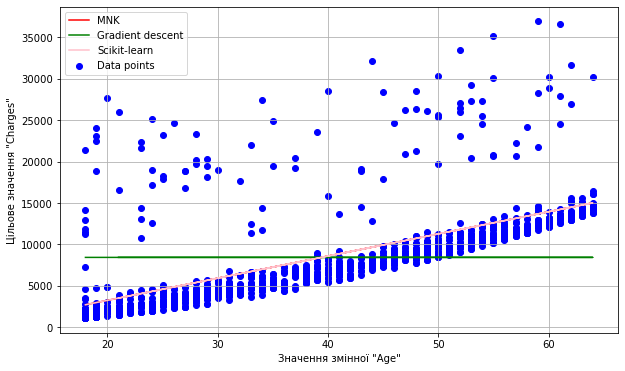

In [19]:
# Візуалізація результатів

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd_1, color='green', label='Gradient descent')
plt.plot(X, predictions_sklearn, color='pink', label='Scikit-learn')
plt.xlabel('Значення змінної "Age"')
plt.ylabel('Цільове значення "Charges"')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з град. спуску: ', b_1, m_1)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з град. спуску:  4217.134140927617 4217.1341409276165
Коефіцієнти з sklearn:  -2091.4205565650846 [  0.         267.24891283]


In [21]:
rmse = mean_squared_error(y, predictions_MNK, squared=False)
print('RMSE МНК: ', rmse)

rmse_fbgd = mean_squared_error(y, predictions_fbgd_1, squared=False)
print('RMSE град. спуску: ', rmse_fbgd)

rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  5990.964530287611
RMSE sklearn:  4662.505766636395


**Висновок:**
- маємо ідентичні результати, використовуючи методи МНК і sklearn
- вирішення задачі градієнтним спуском не дало гарних результатів і ми бачимо більший показник rmse

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [22]:
# створюємо базовий датафрейм
smoker_df = medical_df[medical_df.smoker == 'yes']

# формуємо змінну Х
age_smoker = smoker_df['age']
X_smoker = np.array(age_smoker)
ones_smoker = np.ones_like(X_smoker)

X_smoker_1 = np.column_stack((ones_smoker, X_smoker))

# задаємо цільову змінну у
charges_smoker = smoker_df['charges']
y_smoker = np.array(charges_smoker)

In [23]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg_smoker = LinearRegression()

lin_reg_smoker.fit(X_smoker_1, y_smoker) #тренуємо модель

predictions_sklearn_smoker = lin_reg.predict(X_smoker_1) #робимо передбачення

In [24]:
print('Коефіцієнти з sklearn: ', lin_reg_smoker.intercept_, lin_reg_smoker.coef_)

rmse_sklearn_smoker = mean_squared_error(y_smoker, predictions_sklearn_smoker, squared=False)
print('RMSE sklearn: ', rmse_sklearn_smoker)

Коефіцієнти з sklearn:  20294.128126915966 [  0.         305.23760211]
RMSE sklearn:  26148.867808867617


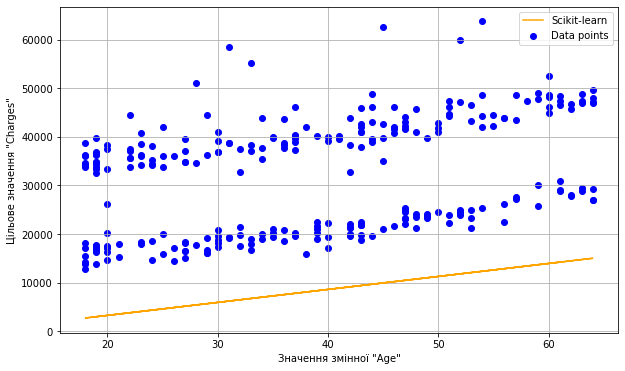

In [25]:
# Візуалізація результатів

plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn_smoker, color='orange', label='Scikit-learn')
plt.xlabel('Значення змінної "Age"')
plt.ylabel('Цільове значення "Charges"')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:**
На основі отриманих результатів розрахунків, я б не рекомендувала дану модель для використання в Компанії.
На візуалізації ми чітко бачимо дві групи `курців`. Також ми маємо коеф. і точність моделі в рази вищі ніж в попередньому завданні для `не курців`. Це говорить про модель з великою похибкою передбачення.

Для побудови більш якісної моделі спочатку необхідно виділити ці групи в окремі датасети, наприклад, `chsrges`<30 000 і >30 000 і потім для кожної з цих груп провести своє навчання